In [2]:
from pathlib import Path
flowers = Path('flower_photos') # Pathlib uses object to represents paths

In [3]:
num_images = len(list(flowers.glob('*/*.jpg'))) #get all of the files that follow that pattern
print(num_images)  #number of images

3670


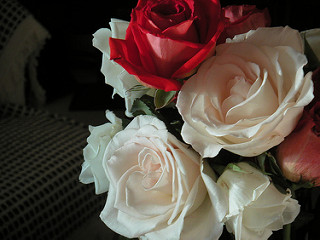

In [4]:
from PIL import Image  #image displayer

roses = list(flowers.glob('roses/*')) #all of the roses in list format
Image.open(roses[1])


# Make Into Dataset

In [5]:
from keras.utils import image_dataset_from_directory

#turn into dataset
train_ds = image_dataset_from_directory(
    flowers,
    validation_split = 0.2, 
    subset = 'training', 
    seed = 123,
    image_size = (128, 128)

)
#the training part (subset)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = image_dataset_from_directory(
    flowers,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(128, 128)
)
#the validation part

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names

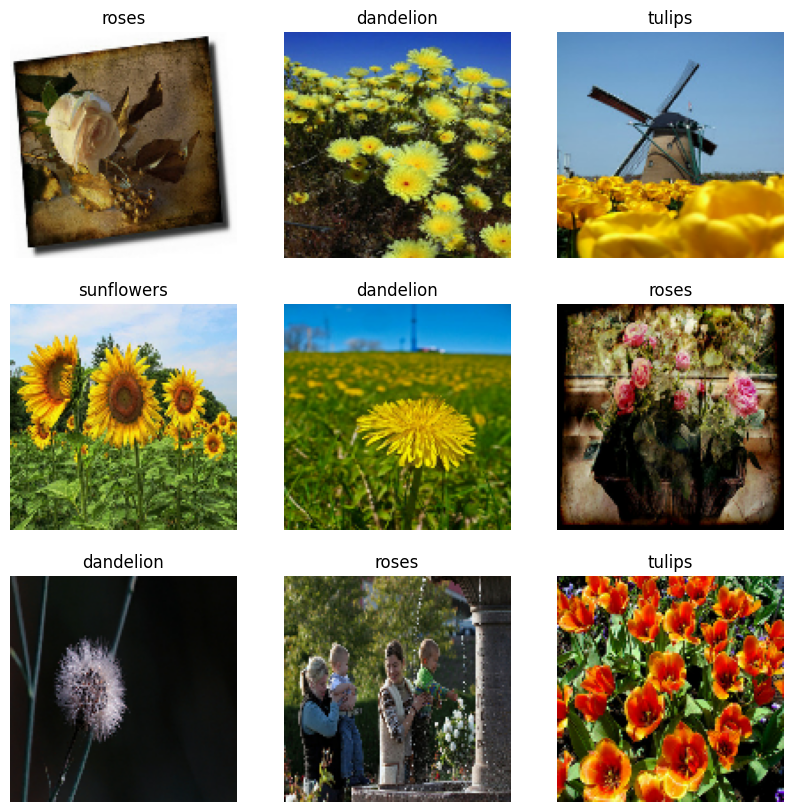

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [9]:
#the dimensions of the batches
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 128, 128, 3)
(32,)


In [10]:
#cache for fast use
import tensorflow as tf

#cacher
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)



In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Rescaling, Softmax, Dropout

#create a model to do stuff to our NEW dataset
model = Sequential(
    [
        Rescaling(1/255.0), #to scale all of the RGB values, model can't handle big values
        
        Conv2D(32, (3, 3), activation = 'relu'),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation = 'relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(64, activation = 'relu'),
        Dropout(0.2),
        Dense(128, activation = 'relu'),
        Dense(5),
    ]
)

In [12]:
# if you really wanted to make a manual learning schedule
'''import keras.optimizers

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.SGD(learning_rate=lr_schedule) '''

'import keras.optimizers\n\nlr_schedule = keras.optimizers.schedules.ExponentialDecay(\n    initial_learning_rate=1e-2,\n    decay_steps=10000,\n    decay_rate=0.9)\nopt = keras.optimizers.SGD(learning_rate=lr_schedule) '

In [13]:
from keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [14]:
#fit

history = model.fit(train_ds, validation_data = val_ds, epochs = 5)
#A History object. Its History.history attribute is a record of training 
# loss values and metrics values at successive epochs, as well as validation 
# loss values and validation metrics values (if applicable).

Epoch 1/5
92/92 [==============================] - 22s 226ms/step - loss: 1.4236 - accuracy: 0.3913 - val_loss: 1.1344 - val_accuracy: 0.5123
Epoch 2/5
92/92 [==============================] - 21s 227ms/step - loss: 1.1252 - accuracy: 0.5429 - val_loss: 1.0271 - val_accuracy: 0.5790
Epoch 3/5
92/92 [==============================] - 20s 220ms/step - loss: 0.9573 - accuracy: 0.6236 - val_loss: 0.9883 - val_accuracy: 0.6063
Epoch 4/5
92/92 [==============================] - 20s 220ms/step - loss: 0.7719 - accuracy: 0.7027 - val_loss: 1.2049 - val_accuracy: 0.5708
Epoch 5/5
92/92 [==============================] - 21s 225ms/step - loss: 0.6098 - accuracy: 0.7691 - val_loss: 1.0855 - val_accuracy: 0.6131


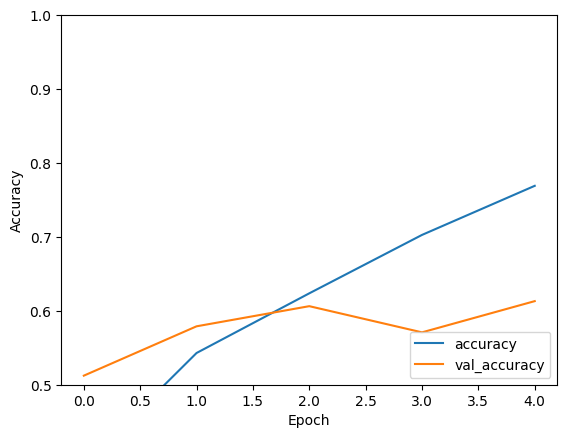

In [16]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')



In [19]:
print(history.history.keys())
history.history['loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[1.4236475229263306,
 1.125171184539795,
 0.9572551250457764,
 0.7718693017959595,
 0.6097787022590637]